# 3.  Visualisation

## 3.1 Introduction
Drawing attractive figures is important. Visualisations are central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention. Besides the attractiveness, correctness is obviously even more important. Misleading data visualisations can lead to misinterpretations and false conclusions, e.g. [example 1](https://www.datapine.com/blog/misleading-data-visualization-examples/), [example 2](https://learningsolutionsmag.com/articles/misleading-data-visualizations-can-confuse-deceive-learners).  

When you're new to Python, the amount of visualisation libraries can be overwhelming. As a general rule of thumb, it's often a better choice to reflect on which type of graph you want to plot and choose the corresponding and appropriate library. For this course we've chosen to dive into the Seaborn library. 

![Choose your library for visualisations!](img/flowchart-visualisation-python.png)

Generally you could summarize that **Matplotlib (pyplot)**  has great flexibility and versatility that comes with the cost of (sometimes) complexity and low-level type of programming. **Seaborn** is a Python data visualisation library which is built on-top of Matplotlib and closely integrated with pandas data structures. It provides a higher-level wrapper on the library which makes it easier to create more aesthetically pleasing plots.  

At the end of this chapter you'll find a bunch of references to blogs with comparisons of different libraries. 

## 3.2 Seaborn

![Seaborn logo](img/seaborn-logo.png)

### 3.2.1 Introduction
An overview of Seaborn plots is accessible on the [documentation website](https://seaborn.pydata.org/examples/index.html). Many plots can be accomplished with only seaborn functions, however for non-conventional plots, further customization is possible using Matplotlib pyplot directly. 

Throughout this chapter we'll be using seaborn, pandas and some of matplotlib's features to further modify our plots.

In [29]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Some notebooks require the explicit setting of matplotlib inline to plot the graphs into the notebook
%matplotlib inline

### 3.2.2 Lineplot  
We will start exploring the Seaborn library with lineplots. 

The following example elaborates on lineplots with a new dataset. This dataset is retrieved from [Datahub.io](https://datahub.io/core/pharmaceutical-drug-spending) and contains the spendings of a bunch of countries in pharmaceutical as from 1971. The dataset is available in the data folder as `pharmaspending.csv`. 

In [ ]:
# Download data from datahub.io. 
pharma = pd.read_csv('data/pharmaspending.csv')

# Inspect the data
pharma

The following is defined:
- x-axis: column name that contains the data for the x-axis = `'TIME'`
- y-axis: column name that contains the data for the y-axis = `'PC_GDP'`
- dataset: name of the dataset = `'pharma'`

Note that the name of the x and y argument are not random. They share the identical name of the column names in the dataframe.

In [ ]:
# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = pharma)

---
### Question:

Knowing that the dataset contains data for 36 countries from 1971 until 2015. What happened when Seaborn made this plot for us?  

---

We can make a subselection of this dataframe that contains the data for Belgium and its neigbhouring countries France, Germany and the Netherlands. 

In [ ]:
# Make empty dataframe
sub_pharma = pd.DataFrame()

# Countries of interest
countries = ['BEL', 'FRA', 'DEU', 'NLD']

# Make subselection dataframe with the data of the countries of interest
for country in countries:
    sub_pharma = sub_pharma.append(pharma.loc[pharma['LOCATION'] == country], ignore_index=True)
    
sub_pharma

In [ ]:
# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = sub_pharma)

In [ ]:
# Make a lineplot of the percentage of GDP over time
sns.lineplot(x = 'TIME', y = 'PC_GDP', data = sub_pharma, hue='LOCATION')

---
### Question:
Why doesn't Seaborn calculate a statistical estimation around the lines in this plot? What has changed as compared to the first lineplot? 

---

### 3.2.3 Barplot

Take the sum of all spendings from oldest until the most recent spendings (TOTAL_SPEND) and make a barplot. Notice that this may lead to misinterpretation and plot the spendings per capita. 

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Plot barplot with similar x, y and data definitions
sns.barplot(x = 'LOCATION', y = 'TOTAL_SPEND', data = pharma)

In [ ]:
# Make sure to set the figure size again to your likings
plt.figure(figsize=(15,6))

# Plot procentual GDP as opposed to total spendings
sns.barplot(x = 'LOCATION', y = 'PC_GDP', data = pharma)

Additional parameters: 
- Use median as the estimate of central tendency: `estimator=median` (from numpy import median)
- Show the standard error of the mean with the error bars: `ci=68`
- Show standard deviation of observations instead of a confidence interval: `ci="sd"` 
- Add “caps” to the error bars: `capsize=.2`
- Use a different color palette for the bars: `palette="Blues_d"`

---
### 3.2.3.1 Exercise
Plot the same barplot but only for Belgium vs the Netherlands. Find a barplot argument that selects which country is selected and hence plotted (instead of making another subselection of the pandas dataframe). 


**Extra**: Adjust the figure with error bar caps, your favourite color palette, make it a horizontal barplot, or experiment with any of the other features. 

---

For the following example, we're going to plot **horizontal** layered barplots. We will re-use the code from exercise [2.5.1 - B](02_Pandas.ipynb) with metagenic classifications. Thus, we already know that each count represents a methylated cytosine in a specific region of a gene, and we added a new column with total counts per chromosome:

In [27]:
# Import data
metagenic = pd.read_csv('data/metagenic.csv', index_col='chr')

# Add a column with total counts
metagenic["total"] = metagenic.sum(axis = 1)

# Order the table per total counts
metagenic = metagenic.sort_values("total", ascending = False)
metagenic

,ribo,exon,5utr,3utr,intron,non_protein_coding,intergenic,total
chr,,,,,,,,
1,274,85,16,88,28,35,22,548
19,215,68,9,73,29,18,18,430
17,211,64,6,67,30,21,23,422
11,175,64,11,44,18,11,27,350
16,168,58,10,54,22,14,10,336
3,156,49,10,47,22,13,15,312
2,152,54,10,42,17,22,7,304
9,144,49,9,36,21,16,13,288
12,139,51,4,50,20,12,2,278


Let's first create a quick and dirty plot, using a whitegrid on the background and setting the size of the plot. 

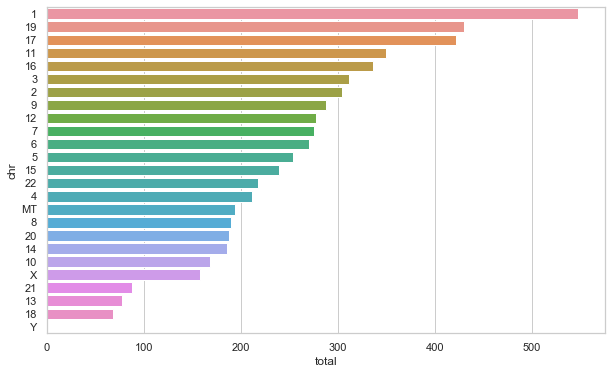

In [31]:
# The following line will make a grid on a white background
sns.set(style="whitegrid")

# Set the size of the figure plot
plt.figure(figsize=(10,6))

# Create a barplot with 
sns.barplot(x="total", y=metagenic.index , data= metagenic)

Althought the colors look wonderful, they are not really informative. Let's add a color palette and divide each bar in different classifications:

In [ ]:
# The following line will make a grid on a white background
sns.set(style="whitegrid")

# Define colorstyle
sns.set_color_codes("deep")

# Define figure size
f, ax = plt.subplots(figsize=(10,6))

# First plot the total counts
sns.barplot(x = "total", y = "chr", data = metagenic, label = "total", color = 'b')
# Then plot the ones with ribo counts
sns.barplot(x = "ribo",y = "chr", data = metagenic, label = "ribo", color="y")
# Third bar with exons
sns.barplot(x = "exon",y = "chr", data = metagenic, label = "exon", color="r")
# Fourth bar with introns 
sns.barplot(x = "intron",y = "chr", data = metagenic, label = "intron", color="g")
#... 

# Add a legend and informative axis label
ax.set(xlabel = "counts", ylabel = "chromosomes", title="Metagenic classification")
ax.legend(loc = "lower right")

### 3.2.4 Multiplot grids
Seaborn also allows you to visualize pairwise relationships and marginal distributions. The iris dataset is the perfect dataset for showing this:

In [ ]:
# We'll be working with the famously known iris dataset to make some seaborn plots. 
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.set(style='white')
# A great way of making pairwise comparisons is pairplot
sns.pairplot(data=iris, hue="species")

### 3.2.5 Scatter plot (Volcano plot)
A useful plot in differential expression analysis (RNA-seq) is a volcano plot. A volcano plot visualises and identifies statistically significant gene expression changes from two different conditions. Essentially, a volcano plot is a scatter plot and can also be approached from this perspective in Seaborn logic. The data for this experiment is retrieved from the GTN tutorial "RNA Seq Counts to Viz in R" ([link](https://galaxyproject.github.io/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-viz-in-r/tutorial.html)).

A volcano plot shows statistical significance (P-value) versus magnitude of change (fold change). The most upregulated genes are towards the right, the most downregulated genes are towards the left, and the most statistically significant genes are towards the top. With this plot, we can then quickly identify genes with large fold changes that are also statistically significant, i.e. probably the most biologically significant genes.

In [ ]:
# Import dataset
volc = pd.read_csv('data/annotatedDEgenes.tabular', sep='\t')
volc

We already have the `log2(FC)` values. The P-value needs to be log10 transformed. Notice that the datatype of the values in the DataFrame are interpreted as `numpy.float64`. 

In [ ]:
# Check the data type of a value in the P-values column
type(volc['P-value'][0])

In the following code block we will add the log10 transformed P-values using Numpy's log10 function. 

In [ ]:
# Log10 transform the p-values 
volc['Log10 P-value'] = -np.log10(volc['P-value'])
volc.head()

In [ ]:
# Volcano plot using Seaborn's scatterplot
sns.scatterplot(x='log2(FC)', y='Log10 P-value', data=volc)

Color the scatter points according to the strandedness

---
### 3.2.5.1 Exercise
Mimic the graph given below which is extracted from the [tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-viz-in-r/tutorial.html#volcano-plot) and represents the final result in this tutorial. 
- Use a darkgrid background
- Color the dots according to its strand orientations
- Add a title, x- and y-labels 
- Save the figure  

Extra: figure out how you can:
- Move the legend outside of the plot
- Remove the upper and right spine of the plots

![Volcano plot](img/volcano-plot-gtn.png)

### 3.2.6 Heatmap
This exercises is the sequel of exercise 2.5.4 in the previous chapter. In this exercise, derived from the GTN, we will plot  the data that we cleaned in the previous chapter to create a heatmap of the top differentially expressed genes in an RNA-seq counts dataset.    

In [ ]:
# 1. Import data & Prepare the data (note the index)
heatmap_df = pd.read_csv('data/heatmap_data.csv', index_col=0)
heatmap_df.head()

It's important that the gene names are the row indeces and the names of the experiments are the column indeces. Besides the indeces, also a normalization will be necessary in order to allow a better interpretation. This normalization is a standard procedure in creating heatmaps and is done by using z-scores. 

In [ ]:
# Importing statistical library from scipy for calculating z-scores
from scipy import stats 

In [ ]:
# 1. Preparing the data
# Data scaling by row (scale genes) with zscores
for row in range(len(heatmap_df)):
    heatmap_df.iloc[row] = stats.zscore(heatmap_df.iloc[row])
    
heatmap_df

In [ ]:
# 2. Set style of the plot
sns.set_style("ticks")
sns.color_palette("deep")

# 3. Define/create the plot
f = plt.figure(figsize=(10,10))
ax = sns.heatmap(heatmap_df, cmap="RdBu", annot=True)

# 4. Tweak lay-out
ax.set(xlabel='Samples', ylabel='Genes', title='Heatmap of DE genes')

In [ ]:
# 2. Set style of the plot
sns.set_style("ticks")
sns.color_palette("deep")

# 3. Define/create the plot
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_df, cmap="RdBu", annot=True)

# 4. Tweak lay-out
ax.set(xlabel='Samples', ylabel='Genes', title='Heatmap of DE genes')

## 3.3  An overview of lay-outing options
Finally, we will maken an overview of the different steps and lay-out options when plotting by using simple line-plots. 

It's difficult to find best practices regarding plotting. However, the following steps can help you with a decent order to render your plots as expected:

---

```python
# 1. Import data
...

# 2. Set style of the plot
sns.set(...)
sns.set_style(...)
sns.set_context(...)
sns.color_palette(...)
sns.axes_style(...)

# 3. Initialise the plot and plot the data. 
fig = plt.figure(...)  || fig, ax = plt.subplots() 
sns.lineplot(...)

# 4. Modify lay-out (title, labels, legend, etc.)
ax.set(...)
plt.xlabel(...)
plt.ylabel(...)

# Save the figure with:
#ax.savefig()
```
---



**Style of the plot**:  
[`sns.set()`](https://seaborn.pydata.org/generated/seaborn.set.html) is the overarching method that sets aesthetic parameters in one step. Alternatively, choose one of the following methods to edit the general style of the plot:
- [`sns.set_style()`](https://seaborn.pydata.org/generated/seaborn.set_style.html) will set the background color of the graph. Examples are: *white*, *whitegrid* or *dark*. If you choose white you will see that it loses some structure, therefore it is possible to use *ticks* on the axes. 
- [`sns.set_context()`](https://seaborn.pydata.org/generated/seaborn.set_context.html) will basically scale your figure for usage in a *paper*, *poster*, *talk* or *notebook* (default). 
- [`sns.color_palettes()`](http://seaborn.pydata.org/tutorial/color_palettes.html) choose any of the color palettes defined in the link or make your own color palette. Options are: *pastel*, *deep*, *husl*, ...
- [`sns.axes_style()`](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style) This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.



**Initialise the plot and plot the data**:  
- First define the figure size and/or subplots. Note that this is done at the matplotlib level: `f = plt.figure(figsize=(10,4))` or `f, ax = plt.subplot(nrows=1, ncols=1, figsize=(10,4))` 
- Use any of [Seaborn's plots](https://seaborn.pydata.org/examples/index.html)

**Modify the lay-out (title, labels, legend, etc.)**:  
Further modifications are possible on the matplotlib level by using `ax.set()` with a list of parameters. Refer to the [official documentation](https://matplotlib.org/3.3.0/api/axes_api.html) for a list of all possibilities. However it's also possible to define them individually using [pyplots methods](https://matplotlib.org/3.1.1/api/pyplot_summary.html). Here are some that you might find interesting:
- `plt.title`
- `plt.xlabel` and `plt.ylabel`
- `plt.xlim` and `plt.ylim`
- `plt.xscale` and `plt.yscale`
- `plt.legend`


![](img/plotting-hierarchy.webp)

---
### 3.3.1 Exercise 
Import and inspect the dataset from [datahub.io](https://datahub.io/core/genome-sequencing-costs) containing the cost of genome sequencing throughout the years (also stored as `data/sequencing_costs.csv`).
- Set the style to a white background with ticks on the axes
- Set the context to a paper format
- Change the figure size
- Rename the x- and y-label and title of the plot 
- Save the figure in your folders 

Tip: you can rotate the x-axis values using the following line of code: `plt.setp(ax.get_xticklabels(), rotation=90)`


![Seq cost per Mb](img/seqcost.png)



---
### 3.3.2 Extra exercise
Modify the code from the previous exercise to make two subplots underneath each other that plot the Cost per Mb over years and the Total cost. 
Find more information on subplots [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) or [here](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8).

![Subplots sequencing cost](img/subplots_seqcost.png)

## 3.4 More exercises! 


- COVID-19: https://epistat.wiv-isp.be/covid/
- Pokemon: 
    - https://elitedatascience.com/python-seaborn-tutorial
    - https://medium.com/@christhai_6937/data-science-in-python-part-2-exploring-pokemon-data-using-pandas-and-seaborn-cd54d1ae5ec0
- Titanic: https://www.kaggle.com/iyadavvaibhav/data-viz-seaborn-exercise

## 3.5 Further reading
The internet is full of blogs discussing visualisation libraries and best practices, here is a start for some further reading and the ones that helped me to make these materials (amongst many others):
- https://realpython.com/python-matplotlib-guide/
- https://mode.com/blog/python-data-visualization-libraries
- https://pbpython.com/visualization-tools-1.html
- https://www.dataquest.io/blog/python-data-visualization-libraries/
- https://lisacharlotterost.de/2016/05/17/one-chart-code/